In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

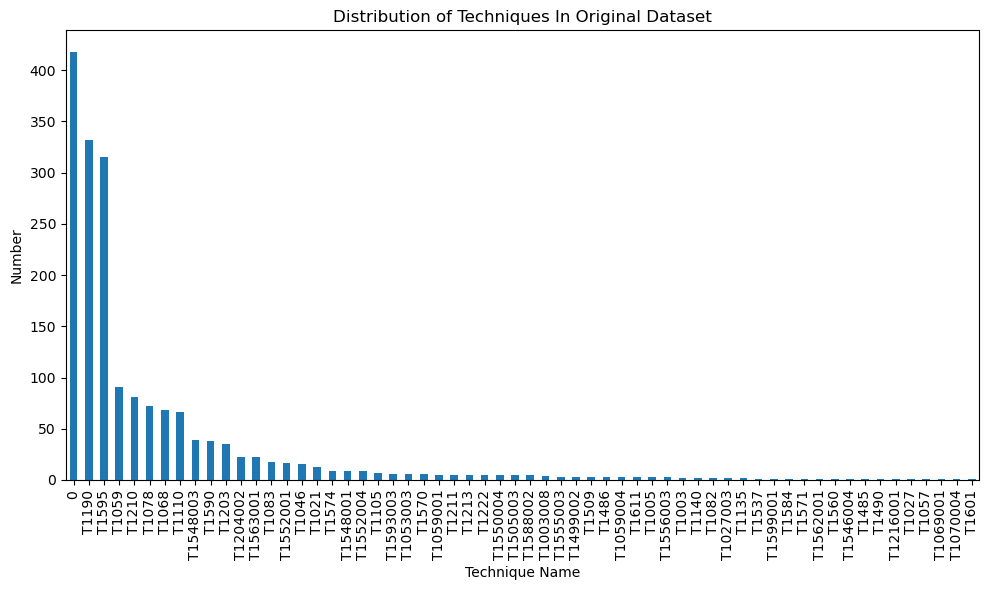

In [23]:
df = pd.read_csv("complete_dataset/baseline/ori_combine.csv",skipinitialspace=True)
map_df = pd.read_csv("map.csv",skipinitialspace=True)
df


# map_df["technique"] = map_df["technique"].str.strip()
# map_df['technique'] = map_df["technique"].str.replace('T', '')
# map_df['technique'] = map_df['technique'].str.replace('.', '')

# map_df = map_df.set_index('technique').to_dict()
#map_df['name']["T1204.002 "]

##################################################################


# df["label"] = df["label"].astype(str).str.strip()
# df["label"]
df["label"] = df["label"].apply(lambda x: "T" + str(x) if x != 0 else x)
count = df['label'].value_counts()

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))
# count.plot(kind='bar')
# plt.xlabel('Label')
# plt.ylabel('Occurrences')
# plt.title('Occurrence of Each Label')
# plt.show()


# Plotting the bar chart with the new title and updated labels
plt.figure(figsize=(10, 6))
count.plot(kind='bar')  # Sort the labels if needed
plt.xlabel('Technique Name')
plt.ylabel('Number')
plt.title('Distribution of Techniques In Original Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels if they are overlapping
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()
# # Count how many labels occur exactly twice
# num_labels_occur_twice = (count <= 10).sum()
# num_labels_occur_twice

In [23]:
#df['label'].str.strip()
def convert(x):
    try:
        if x =="unrelated":
            return x
        return map_df["name_label"][x]
    except:
        print("error", x)
        return

df["text_label"] = df["label"].apply(convert)
df

,url,index,label,text_label,sentence
0,url_4,url_4_0,unrelated,unrelated,Open VirtualBox and create a new virtual machi...
1,url_4,url_4_1,unrelated,unrelated,Insert the Basic Pentesting 1 ISO into the vir...
2,url_4,url_4_2,T1595.002,Reconnaissance,Use Nmap to scan the virtual machine for open ...
3,url_4,url_4_3,T1595.002,Reconnaissance,"Reconnaissance. First, let’s find the IP of th..."
4,url_4,url_4_4,T1595.002,Reconnaissance,This text describes a command run on a compute...
...,...,...,...,...,...
1798,url_91,url_91_61,T1222,Permitting,The file is successfully downloaded in around ...
1799,url_91,url_91_62,unrelated,unrelated,"Essentially, this command ensures that the fil..."
1800,url_91,url_91_63,unrelated,unrelated,It appears that there is only one file in the ...
1801,url_91,url_91_64,T1027,Obfuscating,This server can be used for testing or experim...


In [ ]:
modify_list = [1087001,1087002]

In [19]:
counts = df['label'].value_counts(dropna=False)
grouped = df.groupby('label')
train, test = train_test_split(df, test_size=0.2)
#counts["label"][0]
print(len(counts))
for i in counts.keys():
    print(i, counts[i])

65
1078 96
1046 92
1021 87
1595 74
1059 70
1574 66
1590 62
1110 58
1204002 44
0 41
1083 39
1203 39
1571 37
1105 35
1068 35
1210 34
1552001 34
1190 34
1563001 34
1548003 34
1552004 32
1548001 32
1059001 30
1053003 30
1570 29
1003008 29
1588002 28
1505003 28
1003 28
1213 28
1211 28
1135 28
1059004 28
1005 28
1140 28
1611 27
1499002 27
1555003 27
1556003 27
1069001 27
1057 27
1601 26
1584 26
1599001 26
1537 26
1562001 26
1485 26
1082 26
1090 26
1102001 26
1560 26
1216001 26
1136 26
1490 26
1546004 26
1593003 24
1027003 24
1222 23
1070004 23
1027 23
1486 22
1550004 22
1053005 21
1048 21
1509 1


In [12]:
train
test

,url,index,label,text_label,sentence
1243,url_62,url_62_31,T1046,Networking,get executed with qiu user privileges.. The pr...
526,url_24,url_24_2,unrelated,unrelated,both on a NAT network with CIDR 10.10.10.0/24....
1664,url_83,url_83_26,T1210,Infiltrating,The goal is to establish a reverse TCP connect...
27,url_0,url_0_9,T1190,Exploitation,ooo. The provided content seems to be related ...
1794,url_91,url_91_57,T1068,Escalating,". Additionally, there is a line that says ""/us..."
...,...,...,...,...,...
731,url_38,url_38_10,unrelated,unrelated,i+] URL: <http://192.166.56.10//q@web/> [192.1...
1231,url_62,url_62_19,T1552.001,Credentialing,If you know the name of the channel you want t...
723,url_38,url_38_2,T1595,Scanning,The device associated with this IP address is ...
612,url_31,url_31_2,T1595,Scanning,"The command is ""nmap -p- 192.168.50.185 -A -sV..."


In [13]:
import pandas as pd

check = [1,2,3,4,5,6,7,8,9,10]

# Initialize empty DataFrames for training and testing data
train_df = pd.DataFrame(columns=df.columns)
test_df = pd.DataFrame(columns=df.columns)

# Group by label and apply the splitting logic
for label, group in df.groupby('label'):
    if len(group) in check:
        train_df = pd.concat([train_df, group])
    else:
        train_df = pd.concat([train_df, group.iloc[:10]])
        if len(group) > 10:
            test_df = pd.concat([test_df, group.iloc[10:]])

# Reset the index of the resulting DataFrames
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

column_names = list(train_df.columns.values)
print(column_names)
# print("Training Data:\n", train_df)
# print("\nTesting Data:\n", test_df)



['url', 'index', 'label', 'text_label', 'sentence']


In [14]:
counts = train_df['label'].value_counts()
# counts = tr_df['label'].value_counts()
counts

label
T1210        10
T1068        10
T1595.002    10
T1595        10
T1590        10
             ..
T1571         1
T1216.001     1
T1562.001     1
T1560         1
T1485         1
Name: count, Length: 77, dtype: int64

In [15]:
train_df['label'] = train_df['label'].str.replace('T', '')
train_df['label'] = train_df['label'].str.replace('unrelated', '0')
train_df['label'] = train_df['label'].str.replace('.', '')
# train_df['label'] = train_df['label'].astype(float)
train_df['label'] = train_df['label'].astype(int)
test_df['label'] = test_df['label'].str.replace('T', '')
test_df['label'] = test_df['label'].str.replace('unrelated', '0')
test_df['label'] = test_df['label'].str.replace('.', '')
# test_df['label'] = test_df['label'].astype(float)
test_df['label'] = test_df['label'].astype(int)
type(train_df['label'][0])

numpy.int32

In [16]:
# Save the training data to a CSV file
train_df.to_csv('training_data.csv', index=False)

# Save the testing data to a CSV file
test_df.to_csv('testing_data.csv', index=False)

In [28]:
import pandas as pd
import numpy as np
import nlpaug.augmenter.sentence as nas
from llama_index.llms import Ollama
import nlpaug
import nlpaug.augmenter.word as naw
aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)
# llm = Ollama(model="vicuna:13b")  # Run locally
# aug = nas.LambadaAug()
df = pd.read_csv("training_data.csv",skipinitialspace=True)
data = df['sentence'][0]
# data = """ The following lines show the output of running the " cat " command on the " / etc / shadow " file, which contains encrypted password information for various user accounts on the system."""
augmented_data = aug.augment(data)
augmented_data

# new = "Generate the similar content with similar word. The content: "
# new = new + data
# response = llm.complete(new)
# response = str(response)
# print(response)

['. The following lines show the output of running the " cat " command on the " / etc / shadow " file, which contains encrypted password information for various user accounts on the system. The output is displayed in a format that is not easily readable or understandable by non - IT people. . marlinspike: $ 6 $ wQb5nV3T $ xB2WO / jOkbn4tRUILrckw9LR / OEMtUbFFCYpM3MUHVmtyYW9. ov / aszTpWhLaC26Fvy5tpUUxQbUhCKb14 /: 17484: 0: 9999: 7: :: . The content provided appears to be a command line interface (CLI) prompt for a text editor program called " Sublime Text. " The user is attempting to create a new text file using the command " subl new. txt, " but there seems to be an issue with the registration of the program. The following lines appear to be encrypted text, possibly related to password protection or encryption of the file. . And now I used John The Ripper to crack this hash. This text describes the cracking of a single password hash using the John the Ripper tool. The tool uses multip

In [23]:
data

'. The following lines show the output of running the "cat" command on the "/etc/shadow" file, which contains encrypted password information for various user accounts on the system. The output is displayed in a format that is not easily readable or understandable by non-IT people.. marlinspike: $6$wQb5nV3T$xB2WO/jOkbn4tRUILrckw9LR/OEMtUbFFCYpM3MUHVmtyYW9.ov/aszTpWhLaC26Fvy5tpUUxQbUhCKb14/:17484:0:9999:7:::. The content provided appears to be a command line interface (CLI) prompt for a text editor program called "Sublime Text." The user is attempting to create a new text file using the command "subl new.txt," but there seems to be an issue with the registration of the program. The following lines appear to be encrypted text, possibly related to password protection or encryption of the file.. And now I used John The Ripper to crack this hash. This text describes the cracking of a single password hash using the John the Ripper tool. The tool uses multiple threads and attempts to crack the

In [15]:
import pandas as pd

df = pd.read_csv("label_ori.csv")
# # Group by label and select up to 4 entries from each group
# validation_df = df.groupby('label').head(4)

# # Display the new DataFrame for validation
# validation_df.head(10) # Show the first 10 rows to check the distribution

counts = df['technqiue'].value_counts(dropna=False)
for i in counts.keys():
    print(i, counts[i])


T1210 2
T1003 2
T1003.008 2
T1563.001 2
T1595 1
T1560 1
T1005 1
T1140 1
T1213 1
T1590 1
T1105 1
T1021 1
T1070.004  1
T1027 1
 T1570 1
T1486 1
T1211 1
T1490 1
T1611 1
 T1204.002  1
T1102.001 1
T1087.002 1
T1537 1
T1090 1
T1485 1
T1562.001 1
T1499.002 1
T1550.004 1
T1555.003 1
T1599.001 1
T1584 1
T1552.004 1
T1571 1
T1556.003 1
T1136 1
T1021.002 1
T1135 1
T1505.003 1
T1053.003 1
T1548.001 1
T1216.001 1
T1069.001 1
T1082 1
T1059.006 1
T1059 1
T1053.005 1
T1574.002 1
T1059.001 1
T1203 1
T1046 1
T1588.002 1
T1078 1
T1059.004 1
T1110.001 1
T1593.003 1
T1190 1
T1548.003 1
T1068 1
T1552.001 1
T1057 1
T1595.002 1
T1222 1
T1204.002 1
T1027.003 1
T1083 1
T1040 1
T1049 1
T1021.004 1
T1110 1
T1574 1
T1546.004 1
T1574.006 1
T1601 1
T1087.001 1
T1129 1
